In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
import warnings
warnings.filterwarnings('ignore')

In [3]:
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (10, 6)

In [4]:
df = pd.read_csv(r"C:\Users\rs943\OneDrive\Desktop\Netflix\Netflix Dataset.csv")

In [5]:
df.shape

(7789, 11)

In [6]:
df.head()

,Show_Id,Category,Title,Director,Cast,Country,Release_Date,Rating,Duration,Type,Description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,07:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",PG-13,123 min,Dramas,A brilliant group of students become card-coun...


In [7]:
df.tail()

,Show_Id,Category,Title,Director,Cast,Country,Release_Date,Rating,Duration,Type,Description
7784,s7783,Movie,Zozo,Josef Fares,"Imad Creidi, Antoinette Turk, Elias Gergi, Car...","Sweden, Czech Republic, United Kingdom, Denmar...","October 19, 2020",TV-MA,99 min,"Dramas, International Movies",When Lebanon's Civil War deprives Zozo of his ...
7785,s7784,Movie,Zubaan,Mozez Singh,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...",India,"March 2, 2019",TV-14,111 min,"Dramas, International Movies, Music & Musicals",A scrappy but poor boy worms his way into a ty...
7786,s7785,Movie,Zulu Man in Japan,NaN,Nasty C,NaN,"September 25, 2020",TV-MA,44 min,"Documentaries, International Movies, Music & M...","In this documentary, South African rapper Nast..."
7787,s7786,TV Show,Zumbo's Just Desserts,NaN,"Adriano Zumbo, Rachel Khoo",Australia,"October 31, 2020",TV-PG,1 Season,"International TV Shows, Reality TV",Dessert wizard Adriano Zumbo looks for the nex...
7788,s7787,Movie,ZZ TOP: THAT LITTLE OL' BAND FROM TEXAS,Sam Dunn,NaN,"United Kingdom, Canada, United States","March 1, 2020",TV-MA,90 min,"Documentaries, Music & Musicals",This documentary delves into the mystique behi...


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7789 entries, 0 to 7788
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Show_Id       7789 non-null   object
 1   Category      7789 non-null   object
 2   Title         7789 non-null   object
 3   Director      5401 non-null   object
 4   Cast          7071 non-null   object
 5   Country       7282 non-null   object
 6   Release_Date  7779 non-null   object
 7   Rating        7782 non-null   object
 8   Duration      7789 non-null   object
 9   Type          7789 non-null   object
 10  Description   7789 non-null   object
dtypes: object(11)
memory usage: 669.5+ KB


In [10]:
df.describe(include='all')

,Show_Id,Category,Title,Director,Cast,Country,Release_Date,Rating,Duration,Type,Description
count,7789,7789,7789,5401,7071,7282,7779,7782,7789,7789,7789
unique,7787,2,7787,4050,6831,681,1565,14,216,492,7769
top,s684,Movie,Backfire,"Raúl Campos, Jan Suter",David Attenborough,United States,"January 1, 2020",TV-MA,1 Season,Documentaries,Multiple women report their husbands as missin...
freq,2,5379,2,18,18,2556,118,2865,1608,334,3


In [11]:
# Parse dates and extract year
df['Release_Date'] = pd.to_datetime(df['Release_Date'], format='%B %d, %Y', errors='coerce')
df['Year'] = df['Release_Date'].dt.year

In [12]:
# Clean: Drop missing key cols, filter valid years
df_clean = df.dropna(subset=['Release_Date', 'Country']).copy()
df_clean = df_clean[df_clean['Year'].notna() & (df_clean['Year'] >= 2008)]

In [13]:
df_clean.shape

(7188, 12)

In [14]:
sorted(df_clean['Year'].unique())

[np.float64(2008.0),
 np.float64(2009.0),
 np.float64(2010.0),
 np.float64(2011.0),
 np.float64(2012.0),
 np.float64(2013.0),
 np.float64(2014.0),
 np.float64(2015.0),
 np.float64(2016.0),
 np.float64(2017.0),
 np.float64(2018.0),
 np.float64(2019.0),
 np.float64(2020.0),
 np.float64(2021.0)]

In [15]:
df_clean['Category'].value_counts()

Category
Movie      5149
TV Show    2039
Name: count, dtype: int64

In [16]:
df_clean['Year'].value_counts().sort_index().head(10)

Year
2008.0       2
2009.0       2
2010.0       1
2011.0      13
2012.0       3
2013.0      10
2014.0      24
2015.0      74
2016.0     413
2017.0    1135
Name: count, dtype: int64

In [17]:
# Group by year and category
movies_tv = df_clean.groupby(['Year', 'Category']).size().unstack(fill_value=0)

print("Movies vs TV Shows by Year:")
print(movies_tv)

Movies vs TV Shows by Year:
Category  Movie  TV Show
Year                    
2008.0        1        1
2009.0        2        0
2010.0        1        0
2011.0       13        0
2012.0        3        0
2013.0        6        4
2014.0       19        5
2015.0       54       20
2016.0      249      164
2017.0      839      296
2018.0     1209      331
2019.0     1423      556
2020.0     1252      638
2021.0       78       24


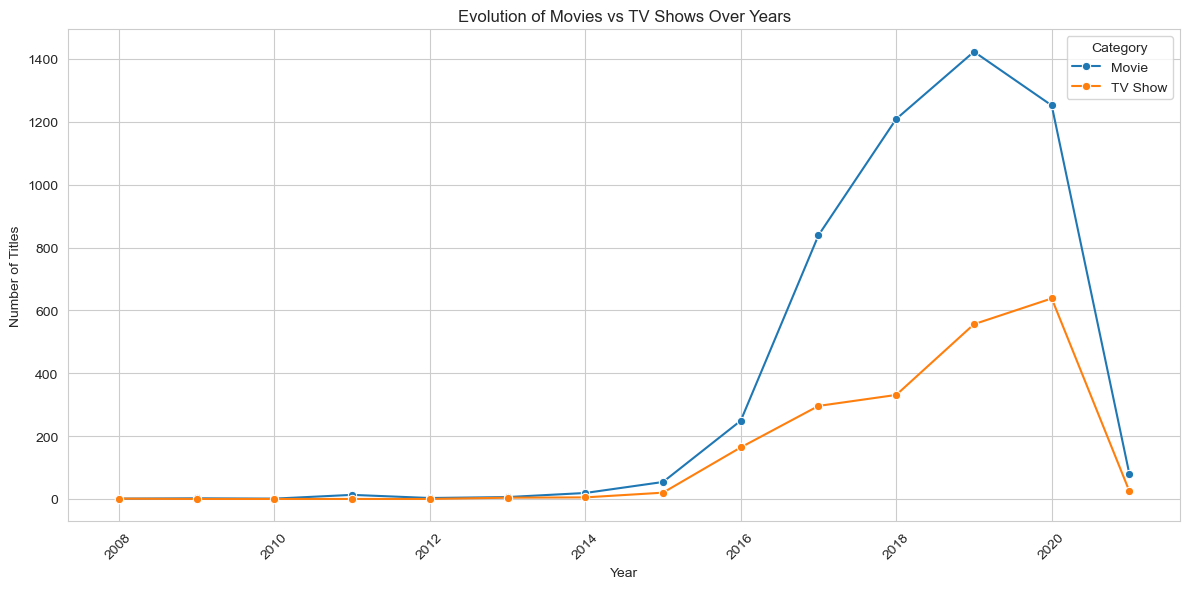

Total Movies: 5149, TV Shows: 2039
Movie growth rate (2016-2020): 251/year


In [18]:
# Melt for seaborn
movies_tv_melt = movies_tv.reset_index().melt(id_vars='Year', var_name='Category', value_name='Count')

plt.figure(figsize=(12, 6))
sns.lineplot(data=movies_tv_melt, x='Year', y='Count', hue='Category', marker='o')
plt.title('Evolution of Movies vs TV Shows Over Years')
plt.xlabel('Year')
plt.ylabel('Number of Titles')
plt.legend(title='Category')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Numpy summary stats
total_movies = np.sum(movies_tv['Movie'])
total_tv = np.sum(movies_tv['TV Show'])
print(f"Total Movies: {total_movies}, TV Shows: {total_tv}")
print(f"Movie growth rate (2016-2020): {np.mean(np.diff(movies_tv.loc[2016:2020, 'Movie'])):.0f}/year")

In [19]:
# Collect all genres
all_genres = []
for genres_str in df_clean['Type'].dropna():
    all_genres.extend(genres_str.split(', '))

genre_counts = Counter(all_genres)
top_genres = genre_counts.most_common(10)
top_genres_df = pd.DataFrame(top_genres, columns=['Genre', 'Count'])

print("Top 10 Genres:")
print(top_genres_df)

Top 10 Genres:
                    Genre  Count
0    International Movies   2342
1                  Dramas   2064
2                Comedies   1430
3  International TV Shows   1022
4           Documentaries    742
5      Action & Adventure    706
6      Independent Movies    672
7               TV Dramas    599
8         Romantic Movies    521
9               Thrillers    481


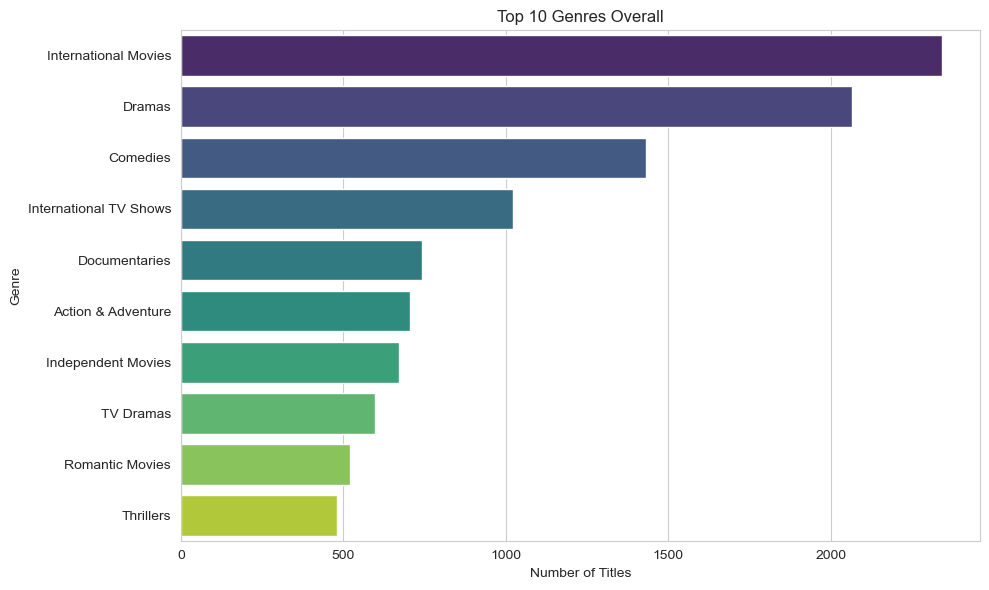

In [20]:
plt.figure(figsize=(10, 6))
sns.barplot(data=top_genres_df, y='Genre', x='Count', palette='viridis')
plt.title('Top 10 Genres Overall')
plt.xlabel('Number of Titles')
plt.ylabel('Genre')
plt.tight_layout()
plt.show()

In [21]:
# Focus on top 5 genres
top5_genres = [g[0] for g in top_genres[:5]]
genre_trends = pd.DataFrame(0, index=sorted(df_clean['Year'].unique()), columns=top5_genres)

for _, row in df_clean.iterrows():
    year = row['Year']
    if pd.isna(year):
        continue
    genres = row['Type'].split(', ') if pd.notna(row['Type']) else []
    for genre in genres:
        if genre in top5_genres:
            genre_trends.at[year, genre] += 1

genre_trends = genre_trends.astype(int)
print("Top 5 Genre Trends (2016-2020 sample):")
print(genre_trends.loc[2016:2020])

Top 5 Genre Trends (2016-2020 sample):
        International Movies  Dramas  Comedies  International TV Shows  \
2016.0                    85      67        49                      89   
2017.0                   407     293       191                     163   
2018.0                   663     526       299                     175   
2019.0                   605     580       430                     300   
2020.0                   549     536       408                     286   

        Documentaries  
2016.0             69  
2017.0            198  
2018.0            156  
2019.0            177  
2020.0            113  


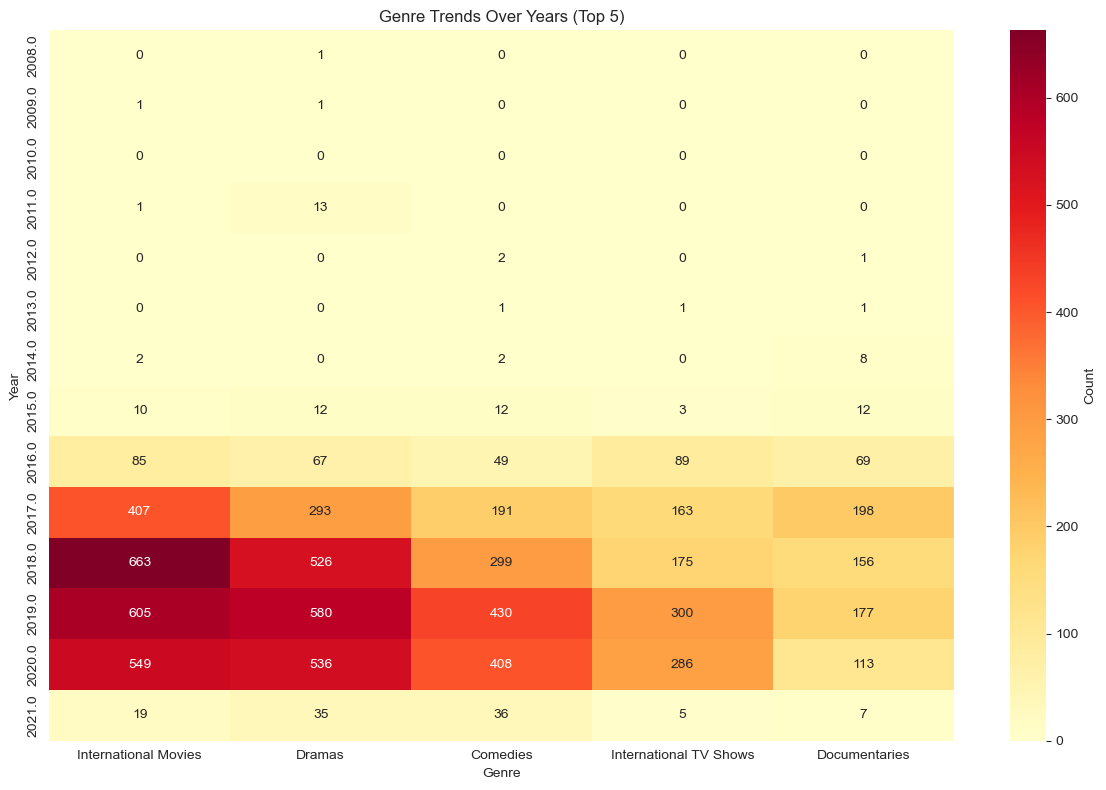

Genre trend correlations:
[[1.         0.99043437 0.96381605 0.94155992 0.92118213]
 [0.99043437 1.         0.98978933 0.96533985 0.88561821]
 [0.96381605 0.98978933 1.         0.9833604  0.85925058]
 [0.94155992 0.96533985 0.9833604  1.         0.88937881]
 [0.92118213 0.88561821 0.85925058 0.88937881 1.        ]]


In [22]:
plt.figure(figsize=(12, 8))
sns.heatmap(genre_trends, annot=True, cmap='YlOrRd', fmt='d', cbar_kws={'label': 'Count'})
plt.title('Genre Trends Over Years (Top 5)')
plt.xlabel('Genre')
plt.ylabel('Year')
plt.tight_layout()
plt.show()

# Numpy: Genre correlation matrix (simple)
print("Genre trend correlations:")
print(np.corrcoef(genre_trends.T))

In [23]:
country_counts = df_clean['Country'].value_counts().head(10)
top_countries_df = pd.DataFrame({'Country': country_counts.index, 'Count': country_counts.values})

print("Top 10 Countries:")
print(top_countries_df)

Top 10 Countries:
          Country  Count
0   United States   2516
1           India    922
2  United Kingdom    381
3           Japan    222
4     South Korea    179
5          Canada    169
6           Spain    130
7          France    113
8           Egypt    101
9          Turkey    100


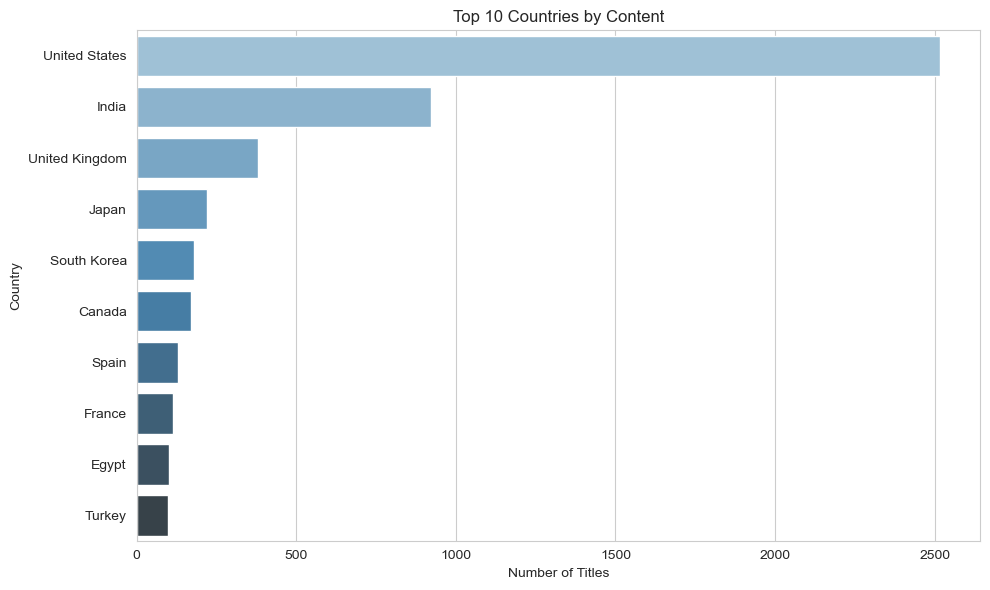

In [24]:
plt.figure(figsize=(10, 6))
sns.barplot(data=top_countries_df, y='Country', x='Count', palette='Blues_d')
plt.title('Top 10 Countries by Content')
plt.xlabel('Number of Titles')
plt.ylabel('Country')
plt.tight_layout()
plt.show()

In [25]:
# Rating counts
rating_counts = df_clean['Rating'].value_counts().head(8)
print("Top Ratings:")
print(rating_counts)

# Ratings by category (numpy array for avg)
avg_rating_movie = df_clean[df_clean['Category'] == 'Movie']['Rating'].map({'TV-MA': 18, 'TV-14': 14, 'R': 17, 'TV-PG': 13, 'TV-Y': 7, 'TV-Y7': 9, 'PG-13': 13, 'PG': 8, 'G': 7, 'NC-17': 18, 'NR': 16, 'TV-G': 7, 'UR': 18}).mean()
avg_rating_tv = df_clean[df_clean['Category'] == 'TV Show']['Rating'].map({'TV-MA': 18, 'TV-14': 14, 'R': 17, 'TV-PG': 13, 'TV-Y': 7, 'TV-Y7': 9, 'PG-13': 13, 'PG': 8, 'G': 7, 'NC-17': 18, 'NR': 16, 'TV-G': 7, 'UR': 18}).mean()
print(f"Avg 'maturity' score - Movies: {avg_rating_movie:.1f}, TV: {avg_rating_tv:.1f}")

Top Ratings:
Rating
TV-MA    2683
TV-14    1769
TV-PG     716
R         663
PG-13     383
PG        244
TV-Y7     217
TV-Y      204
Name: count, dtype: int64
Avg 'maturity' score - Movies: 15.0, TV: 14.7


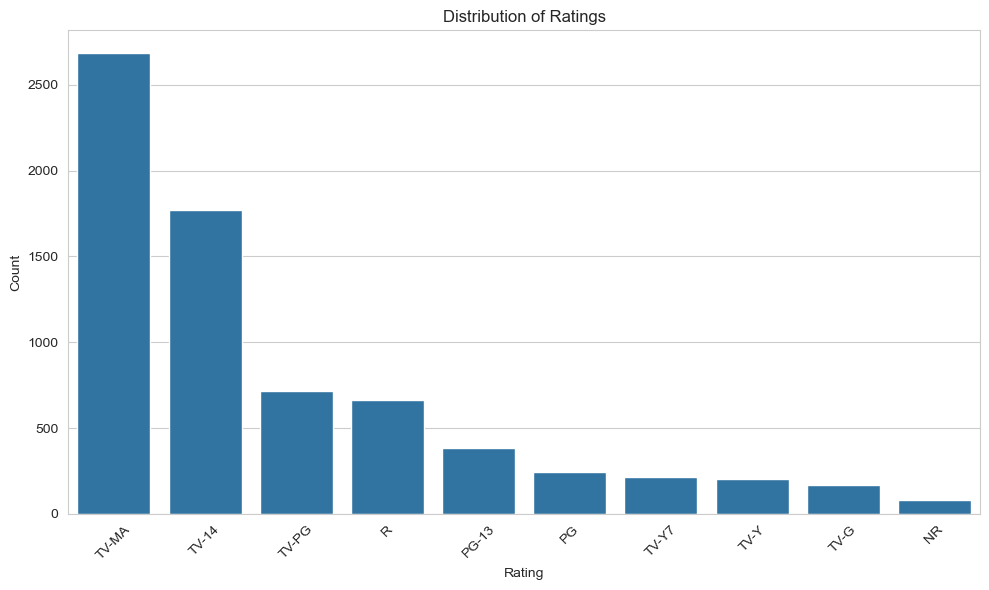

In [26]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df_clean, x='Rating', order=df_clean['Rating'].value_counts().index[:10])
plt.title('Distribution of Ratings')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [27]:
# Filter movies, parse duration
movies = df_clean[df_clean['Category'] == 'Movie'].copy()
movies['Duration_Min'] = movies['Duration'].str.extract('(\d+)').astype(float)
movies['Duration_Seasons'] = movies['Duration'].str.extract('( \d+) Seasons?').astype(float)  # For TV, but focus movies

print("Movie duration stats:")
print(movies['Duration_Min'].describe())

# Numpy: Quartiles
q1, q2, q3 = np.percentile(movies['Duration_Min'].dropna(), [25, 50, 75])
print(f"Duration quartiles: Q1={q1}, Median={q2}, Q3={q3}")

Movie duration stats:
count    5149.000000
mean      100.158866
std        27.574199
min         3.000000
25%        87.000000
50%        98.000000
75%       115.000000
max       312.000000
Name: Duration_Min, dtype: float64
Duration quartiles: Q1=87.0, Median=98.0, Q3=115.0


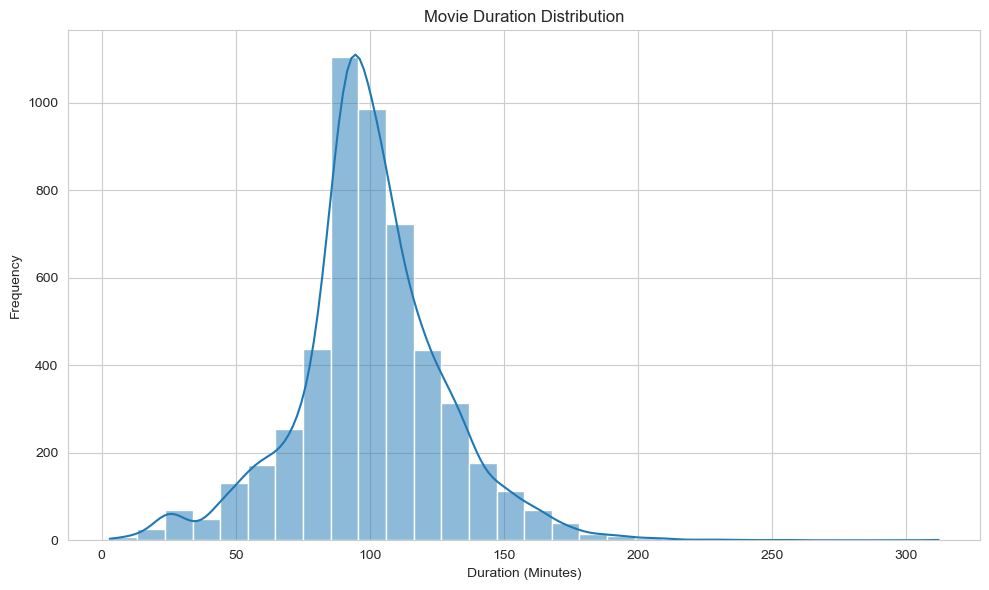

In [28]:
plt.figure(figsize=(10, 6))
sns.histplot(data=movies, x='Duration_Min', bins=30, kde=True)
plt.title('Movie Duration Distribution')
plt.xlabel('Duration (Minutes)')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

In [32]:
# Simple correlation matrix for numeric cols (Year vs Counts)
corr_data = pd.concat([movies_tv, genre_trends], axis=1).dropna()
corr_matrix = np.corrcoef(corr_data.T)
print("Correlation Matrix (Year vs Content Metrics):")
print(pd.DataFrame(corr_matrix, index=corr_data.columns, columns=corr_data.columns).round(2))

# Fixed Pandas crosstab: Category x Top Genre (proper explode)
exploded = (df_clean['Type']
            .str.split(', ', expand=True)
            .stack()
            .reset_index(level=1, drop=True)
            .rename('Genre')
            .to_frame()
            .join(df_clean['Category'])
)
top_genres_list = [g[0] for g in top_genres[:5]]
genres_filtered = exploded[exploded['Genre'].isin(top_genres_list)]
cat_genre = pd.crosstab(genres_filtered['Category'], genres_filtered['Genre'])
print("\nCategory-Genre Crosstab (Top 5):")
print(cat_genre.head())

Correlation Matrix (Year vs Content Metrics):
                        Movie  TV Show  International Movies  Dramas  \
Movie                    1.00     0.96                  0.99    1.00   
TV Show                  0.96     1.00                  0.93    0.96   
International Movies     0.99     0.93                  1.00    0.99   
Dramas                   1.00     0.96                  0.99    1.00   
Comedies                 0.99     0.98                  0.96    0.99   
International TV Shows   0.98     0.99                  0.94    0.97   
Documentaries            0.92     0.85                  0.92    0.89   

                        Comedies  International TV Shows  Documentaries  
Movie                       0.99                    0.98           0.92  
TV Show                     0.98                    0.99           0.85  
International Movies        0.96                    0.94           0.92  
Dramas                      0.99                    0.97           0.89  
Comedie

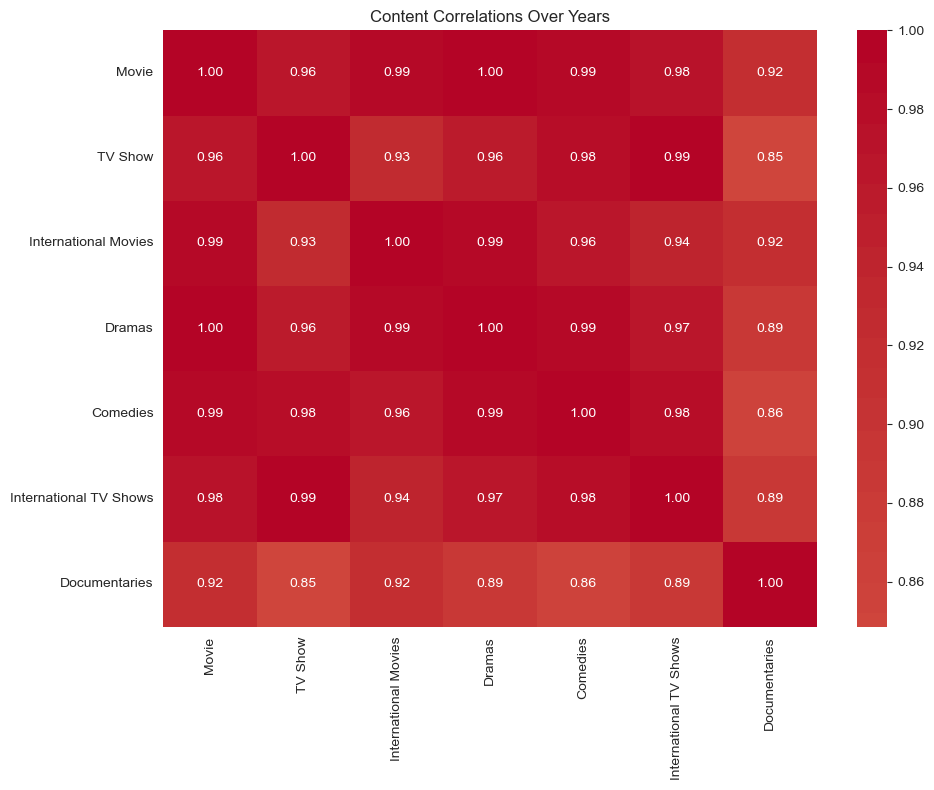

In [33]:
plt.figure(figsize=(10, 8))
sns.heatmap(corr_data.corr(), annot=True, cmap='coolwarm', center=0, fmt='.2f')
plt.title('Content Correlations Over Years')
plt.tight_layout()
plt.show()